In [37]:
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd
plt.style.use('rose-pine-moon')
%matplotlib inline

Resources: 

1) [STAT 414 | Introduction to Probability Theory | Section 2: Discrete Distributions](https://online.stat.psu.edu/stat414/section/2)

2) [jbstatistics](https://www.youtube.com/@jbstatistics)

3) [zedstatistics](https://www.youtube.com/watch?v=YXLVjCKVP7U&list=PLTNMv857s9WVzutwxaMb0YZKW7hoveGLS)


### 1. Discrete Random Variables

#### 1.1. Discrete Random Variable

A random variable *X* is a **discrete random variable** if:
- there are a finite number of possible outcomes of *X*. <br>
For example, selecting a random person from a group of 50 people, there sex is going to either be male or female.<br>
So X is {0, 1} , if male=0 and female=1.

- there are s countably infinite number of possible outcomes of X. <br>
For example, drawing a ace of spades from a pack of card. We can draw it at first the pull, the second pull, third third pull or could be exteremly unlucky and draw at even 52 pulls.<br>
 So there are infinite possible outcomes.<br>
  And X={1, 01, 001}, where 0 =  not drawing ace of spades and 1 = drawing ace of spades.

#### 1.2. Probability Mass Functions

The **probability mass function**, $P(X=x) = f(x)$, of a discrete random variable *X* is a function that satisfies the following properties:

- $P(X=x) = f(x) > 0, \forall x \in S$. <br>
That is for all elements *x* in space *S* their probabilites must be positive.

- $\displaystyle \sum_{x\in S}f(x) = 1$ <br>
That is adding all probabilities of *x*, the sum must be equal to 1.

- $\displaystyle P(X\in A) = \sum_{x\in A} f(x)$ <br> That is to determine the probability associated with the event *A*, you just sum up probabilities of *x* values in *A*.

Since $f(x)$ is a function, it can be presented as:
- table
- graph (histogram, frequency polygon)
- formula

##### 1.2.1 Tabular Form

Consider the data consisting of number of siblings of randomly selected people in tabular form.

\begin{array}{c:c:c:c:c}
   x & 0 & 1 & 2 & 3 \\ \hline
   f(x) & 0.41 & 0.45 & 0.11 & 0.03 \\
\end{array}

In [38]:
data = {'x': [0,1,2,3], 'f(x)': [0.41, 0.45, 0.11, 0.03]}
df = pd.DataFrame(data)
df

,x,f(x)
0,0,0.41
1,1,0.45
2,2,0.11
3,3,0.03


##### 1.2.2 Graphical Form

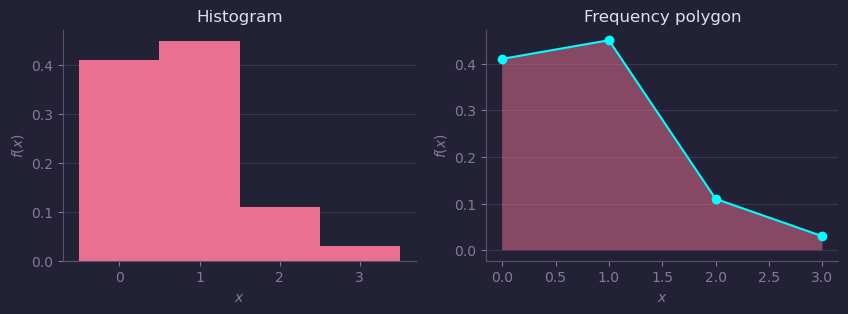

In [39]:
fig = plt.figure(figsize=(10,3))

for i in range(2):
    if i == 0:
        ax = fig.add_subplot(1,2,i+1)
        ax.bar(x=data['x'], height=data['f(x)'], width=1)
        ax.set_title('Histogram')
    elif i == 1:
        ax = fig.add_subplot(1,2,i+1)
        ax.plot(data['x'], data['f(x)'], color='cyan', marker='o')
        ax.fill_between(data['x'], data['f(x)'], alpha=0.5)
        ax.set_title('Frequency polygon')
    ax.set_ylabel('$f(x)$')
    ax.set_xlabel('$x$')

#### 1.3. Cumulative Distribution Function

The cumulative distribution function (CDF or cdf) of the random variable *X* has the following definition:

$F_X(t) = P(X \leq t)$

Properties of Cumulative Distribution Function are:
1. $F_X(t)$ is a non decreasing funtion for $-\infty < t < \infty$.

2. $0 \leq F_X(t) \leq 1$

3. If *X* is a discrete random variable whose minimum value is *a* and maximum value is *b* then :<br>
$F_x(a) = f_x(a) \qquad F_x(b) = 1$ <br>
and $F_X(c) = 0$ if $c \leq 0$.

##### 1.3.1 Graph of Cumulative Distribution Function

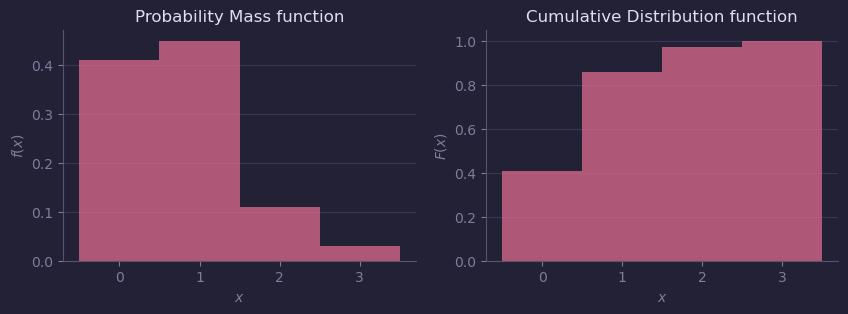

In [40]:
fig = plt.figure(figsize=(10,3))

for i in range(2):
    ax = fig.add_subplot(1,2, i+1)
    ax.set_xlabel('$x$')
    if i == 0:
        ax.bar(data['x'], data['f(x)'], width=1, alpha=0.7)
        ax.set_title('Probability Mass function')
        ax.set_ylabel('$f(x)$')
        
    elif i == 1:
        ax.bar(data['x'], np.cumsum(data['f(x)']), width=1, alpha=0.7)
        ax.set_title('Cumulative Distribution function')
        ax.set_ylabel('$F(x)$')

#### 1.4 Hypergeometric Distribution

If we randomly select *n* items **without replacement** from a set of *N* items of which: 
- *m* of the items are of one type and *N - m* of the items are of a second type.

- then the probability mass function of random variable *X* is called the **hypergeometric distribution** and is of the form:<br><br>
$\displaystyle P(X = x) = f(x) = \frac{{m\choose x}{{N-m}\choose{n-x}}}{N \choose n}$

##### 1.4.1 Example

Consider the game of poker, the probability distribution of spades in a 5-card poker hand is given by

$\displaystyle P(X = x) = f(x) = \frac{{m\choose x}{{N-m}\choose{n-x}}}{N \choose n}$

where N = 52, m = 13, n = 5, x = {0,1,2,3,4,5}

In [41]:
N, m, n = 52, 13, 5
probs = []
for x in range(6):
    probs.append(math.comb(m, x)*math.comb(N-m, n-x)/math.comb(N,n))

df = pd.DataFrame({
    'x': np.linspace(0, 5, 6), 
    'f(x)':probs,
    'F(x)':np.cumsum(probs)
})
display(df)

,x,f(x),F(x)
0,0.0,0.221534,0.221534
1,1.0,0.411420,0.632953
2,2.0,0.274280,0.907233
3,3.0,0.081543,0.988776
4,4.0,0.010729,0.999505
5,5.0,0.000495,1.000000


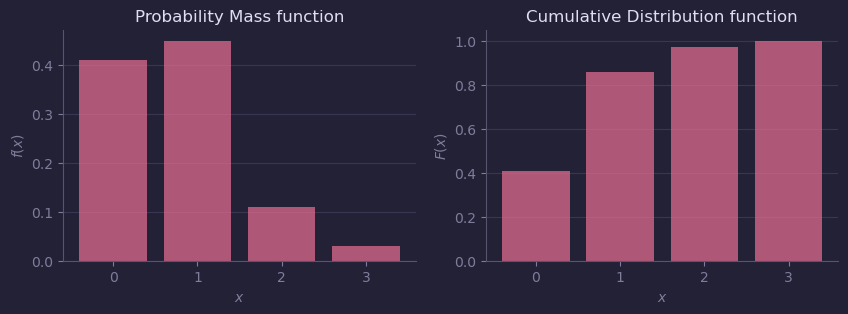

In [42]:
fig = plt.figure(figsize=(10,3))

for i in range(2):
    ax = fig.add_subplot(1,2, i+1)
    ax.set_xlabel('$x$')
    if i == 0:
        ax.bar(data['x'], data['f(x)'], alpha=0.7)
        ax.set_title('Probability Mass function')
        ax.set_ylabel('$f(x)$')
        
    elif i == 1:
        ax.bar(data['x'], np.cumsum(data['f(x)']), alpha=0.7)
        ax.set_title('Cumulative Distribution function')
        ax.set_ylabel('$F(x)$')

##### 1.4.2 Expectations and Varaince

- $\displaystyle E(X) = n \frac{m}{N}$

- $\displaystyle V(x) = n \frac{m}{N}\frac{(N-m)}{N}\frac{(N-n)}{(N-1)}$

### 2. Mathematical Expectation

#### 2.1. Definition

If $f(x)$ is the p.m.f of discrete random variable *X* with support *S*,  then **expected of value** of $u(x)$ is:

$\displaystyle E(u(X)) = \sum_{x\in S}u(x)f(x)$ 

given the summation exsists (i.e less than $\infty$)

##### 2.1.1 Example: Lottery

Consider the following data of *MEGA MILLION ODDS and PRIZES*.

In [43]:
df = pd.DataFrame({
    'Odds': [1/302_575_350, 1/12_60_7306, 1/931_001, 1/38_792, 1/14_547, 1/606, 1/693, 1/89, 1/37],
    'Prize': [20e6, 1e6, 1e4, 5e2, 2e2, 10, 10, 4, 2]
})

df

,Odds,Prize
0,3.304962e-09,20000000.0
1,7.931909e-08,1000000.0
2,1.074113e-06,10000.0
3,2.577851e-05,500.0
4,6.874270e-05,200.0
5,1.650165e-03,10.0
6,1.443001e-03,10.0
7,1.123596e-02,4.0
8,2.702703e-02,2.0


In [44]:
print(f'Expected money gained per ticket: {np.sum(df['Odds']*df['Prize']):.4f}')

Expected money gained per ticket: 0.3127


- If the ticket costed $2 and we bought a large number of tickets, we would get a return of 0.31 cents from each ticket. 
- This does not mean each ticket will have a return of $0.31 as we could win the smaller prizes, but on large this would be the average winning per ticket.

That is if one wishes to make money, buying lottery tickets would not be advisable.

##### 2.1.2 Properties of Expectation

1. $\displaystyle E(c) = \sum_{x\in S} cf(x) = c \sum_{x\in S} f(x) = c\cdot 1 = c$

2. $\displaystyle E[cu(X)] = \sum_{x\in S}cu(x)f(x) = c \sum_{x\in S} u(x)f(x) = cE[u(X)]$

3. $\displaystyle E[\sum_{i=1}^k c_i u_i (X)] = \sum_{i=1}^k c_1 u_1 f(x) + \sum_{i=1}^k c_2 u_2 f(x) + \dots + \sum_{i=1}^k c_k u_k f(x) = \sum_{i=1}^k c_i E[(u_i(X))]$

#### 2.2 Mean of X

Let $u(X)=X$, the expectation of $u(X)$:

$\displaystyle E(X) = \mu = \sum_{x\in S} xf(x)$

is called the *expected value of X* or *the mean of X*. The mean of X is also referred as  *the first moment about the origin*.

**Note**: Mean is only equal to expectation if probability of occurence of all events are equal.

##### 2.2.1 Mean of Hypergeometric distribution

For hypergeometric function the p.m.f is given as

$\displaystyle f(x) = \frac{{m \choose x} {{N-m}\choose{n-x}}}{N\choose n}$

and the mean of X is:

$\displaystyle E(X) = \sum_{x\in S} x\frac{{m \choose x} {{N-m}\choose{n-x}}}{N\choose n}$

For mean to be non zero $x\neq 0$. We also know that:

${N\choose n} = \frac{N!}{n!(N-n)!} = \frac{N(N-1)!}{n\cdot(n-1)!(N-1-(n-1))!} = \frac{N}{n}\cdot {{N-1}\choose{n-1}}$

Using the above expression for each in quantity of mean of X:

$\displaystyle 
E(X) = \sum_{x>0} x\frac{{m \choose x} {{N-m}\choose{n-x}}}{N\choose n} \\[1em]
\Rightarrow \sum_{x>0} x \cdot \frac{m}{x} \cdot \frac{n}{N} \cdot \frac{{{m-1}\choose {x-1}}{{N-m}\choose{n-x}}}{{N-1}\choose{n-1}} \\[1em]
\Rightarrow \frac{mn}{N}\sum_{x>0} \frac{{{m-1}\choose {x-1}}{{(N-1)-(m-1)}\choose{(n-1)-(x-1)}}}{{N-1}\choose{n-1}} \\[1em] 
\Rightarrow \frac{mn}{N} \sum_{x>0} f(x-1) \\[1em]
\Rightarrow E(X) = \frac{mn}{N}\cdot 1 = \frac{mn}{N}
$


##### 2.2.2 Mean of Uniform Distribution

The p.m.f of uniform distribution function is given as:

$f(x) = \frac{1}{m}$ for $x = 1,2,3,\dots,m$

then mean of uniform distribution is given as:

$\displaystyle 
E(X) = \sum_{x=1}^m x \cdot \frac{1}{m} \\[1em]
\Rightarrow \frac{1}{m} \sum_{x=1}^m x  \\[1em]
\Rightarrow \frac{1}{m} [\frac{m(m+1)}{2}] \\[1em]
\Rightarrow E(X) = \frac{m+1}{2}
$

#### 2.3 Variance of X

**Definition**: When $u(X) = (X-\mu)^2$, the epxectation of u(x):

$\displaystyle E[(X-\mu)^2] = \sigma^2 = \sum_{x\in S} (x-\mu)^2f(x)$

is called the *variance of X*. The variance of *X* is also called the *second moment of X about the mean $\mu$*.

Then the *Standard deviation of X* is:

$\displaystyle \sigma = \sqrt{\sum_{x\in S} (x-\mu)^2f(x)}$

##### 2.3.1 Example

In [45]:
df = pd.DataFrame({
    'x':[0,3,4,5], 'f(x)': [0,0.3,0.4,0.3],
    'y':[1,2,6,8], 'f(y)': [0.4,0.1,0.3,0.2]
})
display(df)

,x,f(x),y,f(y)
0,0,0.0,1,0.4
1,3,0.3,2,0.1
2,4,0.4,6,0.3
3,5,0.3,8,0.2


In [46]:
x_mean = np.sum(df['x']*df['f(x)'])
x_var = np.sum((df['x']-x_mean)**2 * df['f(x)'])

y_mean = np.sum(df['y']*df['f(y)'])
y_var = np.sum((df['y']-y_mean)**2 * df['f(y)'])
print(
    f'Mean of x: {x_mean}',
    f'\nVariance of x: {x_var}',
    f'\nMean of y: {y_mean}',
    f'\nVariance of y: {y_var}'
)

Mean of x: 4.0 
Variance of x: 0.6 
Mean of y: 4.0 
Variance of y: 8.4


Note both p.m.f have same mean, so variance helps in distinguishing them. *y* has higher variance thus higher spread than *x*.

##### 2.3.2 Shortcut variance

$\sigma^2 = E[(x-\mu)^2] \\[1em]
= E[x^2 - 2x\mu + \mu^2] \\[1em]
= E(x^2) - 2\mu E(x) + \mu^2 \\[1em]
= E(x^2) - 2\mu^2 + \mu^2 \\[1em]
\sigma^2 = E(x^2) - \mu^2
$

#### 2.4 Sample Mean and Variance

The **sample mean** deonted by $\bar{x}$ is simply the average of n data points:
$$\bar{x} = \frac{x_1+x_2+\dots+x_n}{n} = \frac{1}{n}\sum_{i=1}^{n}x_i$$

The **sample variance** denoted $s^2$ summarizes the "spread" or "variation" of the data:
$$s^2 = \frac{1}{n-1} \sum_{i=1}^n(x_i-x)^2$$

and the **sample standard deviation** is the positive root of variance.

**Shortcut sample variance**:
$$s^2 = \frac{1}{n-1}\sum_{i=1}^n (x_i - \bar{x})^2 \\[1em]
= \frac{1}{n-1}\left[\sum_{i=1}^n (x_i^2 - 2x_i\bar{x} + \bar{x}^2)\right] \\[1em]
= \frac{1}{n-1} \left[\sum_{i=1}^n x_i^2 - 2\bar{x} \sum_{i=1}^nx_i + n \bar{x}^2\right] \\[1em] 
= \frac{1}{n-1} \left[\sum_{i=1}^n x_i^2 - 2n\bar{x}^2 + n\bar{x}^2\right] \\[1em]
= \frac{1}{n-1} \left[\sum_{i=1}^n x_i^2 - n\bar{x}^2 \right]
$$

##### 2.4.1 Example

In [47]:
df = pd.DataFrame({
    'hours slept': [7,6,8,4,2,7,6,7,6,5]
})
display(df)

,hours slept
0,7
1,6
2,8
3,4
4,2
5,7
6,6
7,7
8,6
9,5


In [48]:
mean = df['hours slept'].mean()
variance = np.var(df['hours slept'], ddof=1)
print(
    f'For random 10-people'
    f'\nMean of hours slept : {mean}',
    f'\nVariance of hours slept: {variance:.4f}',
    f'\nStandard deviation of hours slept: {variance**0.5:.4f}'
    )

For random 10-people
Mean of hours slept : 5.8 
Variance of hours slept: 3.0667 
Standard deviation of hours slept: 1.7512


### 3. Moment Generating Functions

#### 3.1. Definition

Let *X* be a discrete random variable with probability mass function *f(x)* and space *S*. Then:
$$M(t) = E(e^{tX}) = \sum_{x\in S}e^{tx}f(x)$$
is the **moment generating function** of *X* as long as the summation is finite for some interval of *t* around 0.

Taking derivatives of moment generating function w.r.t to t gives:

$\displaystyle 
M'(t) = \sum_{x\in S} xe^{tx}f(x)\\[1em]
M''(t) = \sum_{x\in S} x^2e^{tx}f(x)\\[1em]
\qquad \vdots \\[1em]
M^n(t) = \sum_{x\in S} x^ne^{tx}f(x)\\[1em]
$

Substitutting t = 0 in first derivative expression we get:

$\displaystyle M'(0) = \sum_{x\in S} xf(x) = E(X)$

We can generalise this expression for any nth derivative and this leads to the conclusion that:

$M^{(r)}(0) = E(X^r)$

##### 3.1.1. MGF for binomial random variable

$$M(t) = E(e^{tX}) = \sum_{x=0}^n e^{tx} {n\choose x} p^x (1-p)^{(n-x)} \\[1em]
= \sum_{x=0}^n {n\choose x} (pe^t)^x(1-p)^{(n-x)}
$$
From binomial expansion we know that $\displaystyle(a+b)^n = \sum_{x=0}^n{n\choose x} b^x a^{(n-x)}$. Comparing with above expression: 
$$M(t) = [(1-p) + pe^t]^n$$
for $-\infty < t < \infty$ 

#### 3.2. Finding Moments

- **Mean**: $u = E(X) = M'(0)$
- **Variance**: $\sigma^2 = E(X^2) - [E(X)]^2 = M''(0) - [M'(0)]^2$

From previous example we try to find moment generating function for a binomial random variable X:<br><br>
$
\Rightarrow M(t) = [(1-p) + pe^t]^n \\[1em]
\Rightarrow M'(t) = n[1-p+pe^t]^{(n-1)}(pe^t) \\[1em]
\Rightarrow M'(0) = n[1-p+p]^{(n-1)}(p) = np 
$
<br><br>For variance we calculate the second derivative: <br><br>
$
\Rightarrow M''(t) = n[1-p+pe^t]^{(n-1)}(pe^t) + (pe^t)n(n-1)n[1-p+pe^t]^{(n-2)}(pe^t) \\[1em]
\Rightarrow M''(0) = np + pn(n-1)(p) \\[1em]
\Rightarrow M''(0) = np + n^2p^2 - np^2
$
<br><br>So the expression for variance becomes:<br><br>
$\Rightarrow \sigma^2 = M''(0) - [M'(0)]^2 \\[1em]
\Rightarrow \sigma^2 = np + n^2p^2 - np^2 - n^2p^2 \\[1em]
\Rightarrow \sigma^2 = np(1-p)$

#### 3.3. Finding Distributions

A moment-generating function uniquely determines the probability distribution of a random variable.

We can express moment generating function as:<br><br>
$\displaystyle M(t) = E(e^{tX}) = \sigma_{x\in S}e^{tx} f(x) \\[1em]
\Rightarrow M(t) = e^{tb_1}f(b_1) + e^{tb_2}f(b_2) + \dots
$
<br><br>Therefore the coefficient of $e^{tb_i}$ is the probability $f(b_i) = P(X=b_i)$.<br>
Therefore, the mgf uniquely determines the distribution of a random variable.<br>
This property of the mgf is sometimes referred to as the uniqueness property of the mgf.

##### 3.3.1. Example

$M(t) = \frac{1}{10}e^{t} + \frac{2}{10}e^{2t} + \frac{3}{10}e^{3t} + \frac{4}{10}e^{4t}$
<br><br>Than pmf of X is:<br><br>
$x = \begin{cases}
\frac{1}{10},\; x=1  \\
\frac{2}{10},\; x=2  \\
\frac{3}{10},\; x=3  \\
\frac{4}{10},\; x=4  \\
\end{cases}
$

### 4. Binomial Distribution

#### 4.1. Definition

A discrete random variable *X* is a binomial random variable if:
- An experiment, or trial, is performed in exactly the same way *n* times.
- Each of the *n-trials* has only two possible outcomes. One of the outcomes is called a "success," while the other is called a "failure." Such a trial is called a **Bernoulli trial**.
- The *n* trials are **independent**.
- The probability of success, denoted *p*, is the same for each trial. The probability of failure is *q=1-p*.

Probability Mass Function of Binomial Distribution is given as:
$$P(x) = {n \choose x} p^x (1-p)^{(n-x)}$$

##### 4.1.1. Example

By some estimates, twenty-percent (20%) of Americans have no health insurance. Randomly sample n=15 Americans. Let *X* denote the number in the sample with no health insurance. Find the probability that **at most 5** of the 15 sampled has no health insurance.

In [49]:
n, p, x = 15, 0.2, 5
probs = []
for i in range(x+1):
    probs.append(math.comb(n, i)*p**i*(1-p)**(n-i))
print(f'Probavility that at most 5 of the 15 sampled people have no health insurance:\n{np.sum(probs):.4f}')

Probavility that at most 5 of the 15 sampled people have no health insurance:
0.9389


#### 4.2 Effect of n and p on Shape

In [50]:
def get_binomial_probabilites(n, p):
    probs = []
    for i in range(n+1):
        probs.append(math.comb(n,i) * p**i * (1-p)**(n-i))
    return probs

##### 4.2.1 Varying probability of success

*Methodology*: We keep *n* small and vary *p*.

In [51]:
df = pd.DataFrame({
    'n':[15, 15, 15],
    'p':[0.2, 0.5, 0.8]
})
display(df.T)

,0,1,2
n,15.0,15.0,15.0
p,0.2,0.5,0.8


In [52]:
all_probs = []
for i in range(3):
    all_probs.append(get_binomial_probabilites(df['n'][i], df['p'][i]))

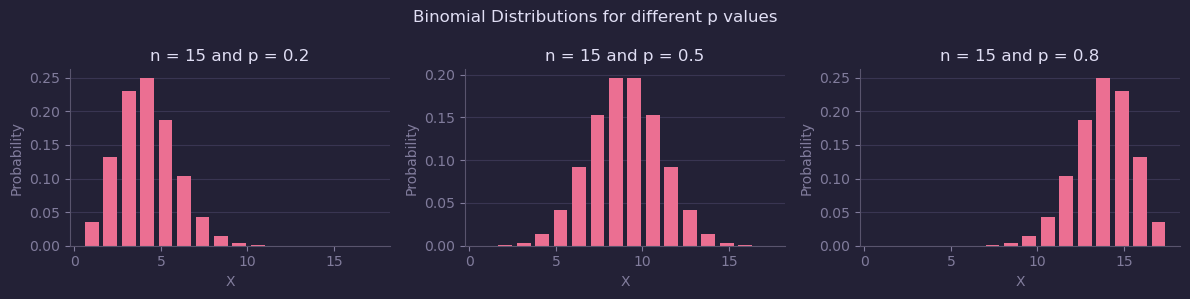

In [53]:
fig = plt.figure(figsize=(12,3), tight_layout=True)
fig.suptitle(f'Binomial Distributions for different p values')
for i in range(3):
    ax  = fig.add_subplot(1,3,i+1)
    ax.bar(np.linspace(0, len(all_probs[i]), len(all_probs[i]))+1, all_probs[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Probability')
    ax.set_title(f'n = {df['n'][i]} and p = {df['p'][i]}')

**Observations**: (Note that *n* should be small)
1. If $p<0.5$, the distribution is **right-skewed**.
2. If $p = 0.5$, the distribution is **symmetric**.
3. If $p > 0.5$, the distribution is **left skewed**.

##### 4.2.2 Varying sample size

In [54]:
df = pd.DataFrame({
    'n':[15, 50, 100],
    'p':[0.8, 0.8, 0.8]
})
display(df.T)

,0,1,2
n,15.0,50.0,100.0
p,0.8,0.8,0.8


In [55]:
all_probs = []
for i in range(3):
    all_probs.append(get_binomial_probabilites(df['n'][i], df['p'][i]))

In [56]:
np.median(all_probs[0])

np.float64(0.00863691079679999)

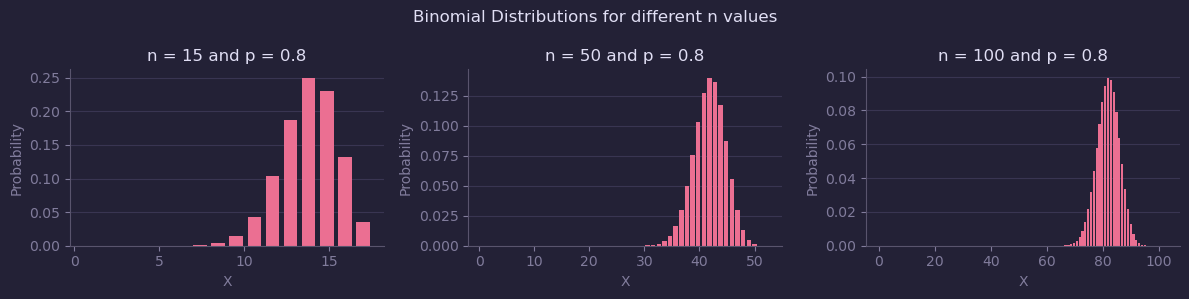

In [57]:
fig = plt.figure(figsize=(12,3), tight_layout=True)
fig.suptitle(f'Binomial Distributions for different n values')
for i in range(3):
    ax  = fig.add_subplot(1,3,i+1)
    ax.bar(np.linspace(0, len(all_probs[i]), len(all_probs[i]))+1, all_probs[i])
    ax.set_xlabel('X')
    ax.set_ylabel('Probability')
    ax.set_title(f'n = {df['n'][i]} and p = {df['p'][i]}')

**Observation**:
- As we increase n the binomial distribution becomes more symmetric.
- Also the peak probability in the graph reduces.

#### 4.3. Mean and Variance

##### 4.3.1. Mean

If *X* is a binomial random variable, then the mean of X is:<br><br>
$\displaystyle
\mu = E(x) = \sum_{x=0}^n \frac{n!}{x!(n-x)!}p^x(1-p)^{(n-x)} \\[1em]
= \sum_{x=1}^n \frac{n!}{(x-1)!(n-x)!}p^x(1-p)^{(n-x)}
$
<br><br>At $x = 0$ the expression turns to 0, so we eliminate it. Next, we do a change of variable such that $k = x-1$<br><br>
$\displaystyle
= \sum_{k=0}^{n-1} \frac{n!}{k!(n-1-k)!}p^{(k+1)}(1-p)^{(n-1-k)} \\[1em]
= np \sum_{k=0}^{n-1} \frac{(n-1)!}{k!((n-1)-k)!}p^{k}(1-p)^{((n-1)-k)} \\[1em]
= np  \sum_{k=0}^{n-1} f(k) = np
$
<br><br>where $f(k)$ is probability mass function of Binomial distribution $b(n-1, p)$.

##### 4.3.2. Variance

We try to simplify the expression fo variance, so it becomes easier to get varainces in terms of *n* and *p* <br><br>
$\sigma^2 = E(x^2) - [E(x)]^2 \\[1em]
= E(x^2) - E(x) + E(x) - [E(x)]^2 \\[1em]
= E[x(x-1)] + E(x) - [E(x)]^2$
<br><br>Now we know $E(x) = np$ and $[E(x)]^2 = n^2p^2$. So we try to simplify first term, note that the indexing has to be $x>2$ otherwise the expression becomes 0. So we substitute $k=x-2$<br><br>
$\displaystyle
E(x(x-1)) = \sum_{k=0}^{n-2} \frac{n!}{k!(n-2-k)!}p^{(k+2)}(1-p)^{(n-2-k)} \\[1em]
= n(n-1)p^2 \sum_{k=0}^{n-2} \frac{(n-2)!}{k!(n-2-k)!}p^{k}(1-p)^{(n-2-k)} \\[1em]
= n(n-1)p^2 \sum_{k=0}^{n-2} f(k) = n(n-1)p^2
$
<br><br>$f(k)$ is the p.m.f. of binomial distribution $b(n-2, p)$ Now we substitute in orignal equation:<br><br>
$\sigma^2 = n(n-1)p^2 + np - n^2p^2 \\[1em]
= np - np^2 = np(1-p)
$

##### 4.3.3. Example

The probability that a planted radish seed germinates is 0.80. A gardener plants nine seeds. Let *X* denote the number of radish seeds that successfully germinate? What is the average number of seeds the gardener could expect to germinate? Also What is the variance and standard deviation of *X*?

In [58]:
n, p = 9, 0.8
print(
    f'Average number of seed that germinate: {n*p}',
    f'\nVariance of x: {n*p*(1-p):.4f}',
    f'\nStandard deviation of x: {(n*p*(1-p))**0.5}'
)

Average number of seed that germinate: 7.2 
Variance of x: 1.4400 
Standard deviation of x: 1.2


The mean signifies that when the farmer repeats the process of planting 9 seeds a lot of times, the average number of seed germinating would be 7.2, with are deviation of $\pm 1.2$.

### 5. Geometric and Negative Binomial Distributions

#### 5.1 Geometric Distribution

For a geometric distribution following is true:
- P(Success) = p, and this stays constant from trial to trial
- $X$ repersents the number of trials needed to get the first success.

For the first success to occur on the xth trial:
1. The first $x-1$ trials must be failures with each trial having a probability of $(1-p)$. Now since we get the success at $xth$ time, the total probability of failure is $(1-p)^{(x-1)}$. 

2. The $xth$ trial must be a success with a probability *p*.

3. So the total probability is $P(X=x) = (1-p)^{(x-1)}p$. This is the probability mass function of geometric distribution.

4. Note that $x = 1,2,3,\dots$. That is x can any value greater than zero with no upper bound.

5. The mean is given by $\mu = \frac{1}{p}$

6. The standard deviation is given by $\sigma^2 = \frac{1-p}{p^2}$

**Key Understanding**: Geometric Distribution looks at how many trial do we require until we get one passing unit.

##### 5.1.1. Example

*Example:* In a large population of adults, 30% people have recieved CPR training.
If adults from this population are randomly selected, what is the probability that the 6th person sampled is the first that have recieved CPR training.

In [59]:
p, x = 0.3, 6
print(
    f'Probability that 6th person selected is the first one with CPR training:\n{(1-p)**(x-1)*p:.4f}',
    f'\nMean: {1/p:.4f}',
    f'\nStandard deviation: {((1-p)/p**2)**0.5:.4f}'
    )

Probability that 6th person selected is the first one with CPR training:
0.0504 
Mean: 3.3333 
Standard deviation: 2.7889


In [60]:
probs = []
for i in range(15):
    probs.append((1-p)**(i-1) * p)

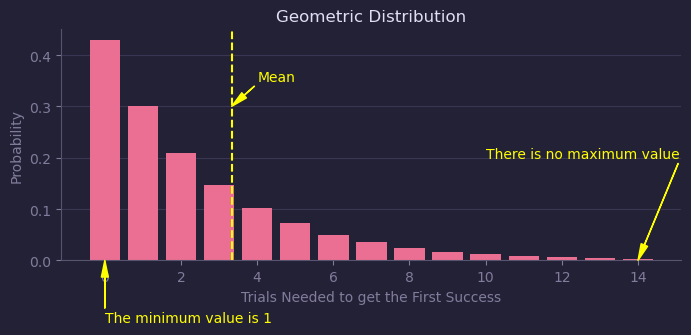

In [61]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,1,1)
ax.bar(np.arange(0, 15, 1), probs)
ax.axvline(1/p, color='yellow', ls='--')

# plot labels
ax.set_xlabel('Trials Needed to get the First Success')
ax.set_ylabel('Probability')
ax.set_title('Geometric Distribution')

# Annotations
ax.annotate('The minimum value is 1', xy=(0,0), xytext=(0, -0.12), color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})
ax.annotate('There is no maximum value',  xy=(14,0), xytext=(10, 0.2), color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5})
ax.annotate('Mean',  xy=(3.33,0.3), xytext=(4, 0.35), color='yellow', arrowprops={'color':'yellow','width':0.2, 'headwidth': 5});

**Observation**:
- Mode of the distribution is always 1.
- The probabilites always decrease, showing right skewness.

Example: What is the probability that the first person trained in CPR occurs on or before the 3rd people sampled?<br><br>
Solution: The probability would simply be the sum of finding the person with training as the first, second or third person:<br><br>
$P(X\leq 3) = P(X=1) + P(X=2) + P(X=3)$ <br><br>
Yet this could become computationally heavy if we had to do for lots more probabilities. An easier way would be to do the reverse scenario. That is we would like to find the probabilty of not finding no people with training before 3 (i.e. 3 failures).


In [62]:
temp = []
for i in range(1, 4):
    temp.append((1-p)**(i-1)*p)

print(
    f'Probability that the first person trained in CPR occurs on or before the 3rd people sampled:\n{np.sum(temp)}',
    f'\n1 - P(X>3) : {1-(1-p)**3}'
)

Probability that the first person trained in CPR occurs on or before the 3rd people sampled:
0.657 
1 - P(X>3) : 0.657


From above example we can intuitvely conculude that probability of cumulative distribution is:

$F(x) = P(X\leq x) = 1 - (1-p)^x$

#### 5.2 Negative Binomial Distribution

**Key Idea**: The negative binomial distribution is the distribution of the number of trials needed to get the rth success.

For the rth success to occur on the xth trial:
- The first $x-1$ trials must result in $r-1$ successes.<br><br>
$ {x-1\choose r-1} p^{(r-1)} (1-p)^{(x-1) - (r-1)} $

- The xth trial must be a success, which has a probability of $p$.

- The **probability mass function** is the product of above two probabilites:<br><br>
$P(X=x) = {x-1\choose r-1} p^r (1-p)^{(x-r)}$
<br><br>for $x = r, r+1, \dots$, with no upper bound.

- The **mean** of negative binomial distribution is given as:<br><br>
$\mu = \frac{r}{p}$

- The **variance** of of negative binomial distribution is given as:<br><br>
$\sigma^2 = \frac{r(1-p)}{p^2}$

- The **moment generating function** of a negative binomial random variable *X* is:<br><br>
$M(t) = \frac{(pe^t)^r}{[1-(1-p)e^t]^r}$

##### 5.2.1. Example

A person conducting telephone surveys must get 3 more completed surveys before their job is finished.

On each randomly dialed number, there is a 9% chance of reaching an adult who will complete the survey.

What is the probability the 3rd completed survey occurs on the 10th call.

In [63]:
r, p, x = 3, 0.09, 10
print(
    f'Probability the 3rd completed survey occurs on the 10th call:\n{math.comb(x-1, r-1)*p**r * (1-p)**(x-r):.4f}',
    f'\nMean: {r/p:.4f}',
    f'\nStandard Deviation: {(r*(1-p)/p**2)**0.5:.4f}'
)

Probability the 3rd completed survey occurs on the 10th call:
0.0136 
Mean: 33.3333 
Standard Deviation: 18.3586


In [64]:
probs = []
for i in range(3, 101):
    probs.append(math.comb(i-1, r-1) * p**r * (1-p)**(i-r))

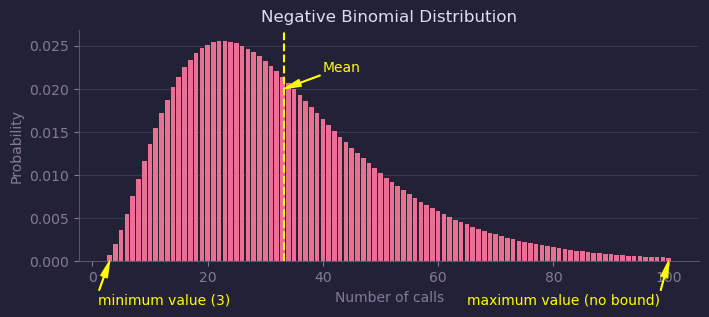

In [65]:
fig = plt.figure(figsize=(8,3))
ax = fig.add_subplot(1,1,1)
ax.bar(np.arange(3, 101, 1), probs)
ax.axvline(r/p, color='yellow', ls = '--')

# plot labels
ax.set_xlabel('Number of calls')
ax.set_ylabel('Probability')
ax.set_title('Negative Binomial Distribution')

# Annotations
ax.annotate(f'minimum value ({r})', (3,0), (1, -0.005), color='yellow', arrowprops={'headwidth':5.0, 'width':0.5, 'color':'yellow'})
ax.annotate('maximum value (no bound)', (100,0), (65, -0.005), color='yellow', arrowprops={'headwidth':5.0, 'width':0.5, 'color':'yellow'})
ax.annotate('Mean', (r/p,0.020), (40, 0.022), color='yellow', arrowprops={'headwidth':5.0, 'width':0.5, 'color':'yellow'});

### 6. Poisson Distribution

#### 6.1. Definition

Suppose
- Events are occuring independently
- The probability that an event occurs in a given length of time does not change through time.

Then *X*, the number of events in a fixed unit of time, has a **Poisson Distribution**. <br>
The Poisson probability mass function is given as:

$P(X=x) = \frac{\lambda^x e^{-\lambda}}{x!}$

for $x = 0,1,2,\dots$. For higher x probability would reduce close to zero.

Properties: 
- For Poisson distribution the **mean** as well as **variance** is $\mu = \sigma^2 = \lambda$.

- **Moment Generating function** of a Poisson random variable *X* is :<br>
$M(t) = e^{\lambda(e^t-1)}$ for $-\infty < t < \infty$ 

##### 6.1.1. Example

The number of click-through sales from an advertisement is Poisson distributed with a mean of 12-click through sales per day. Find the probability of getting:<br>
a. Exactly 10 click-thorugh sales in the first day.<br>
b. At leats 10 click throught sales in the first day.<br>
c. More than one sales in the first hour.<br>

Solution <br><br>
a. P(X=10)=


In [66]:
l, x = 12, 10
print(
    f'P(10 click through sales in the first day): {l**x*math.exp(-l)/math.factorial(x):.4f}'
)

P(10 click through sales in the first day): 0.1048


b. We cannot directly calculate $P(X\geq 10)$ since x has upper bound of $\infty$. So we calculate the following <br><br>
$1 - P(X<10) = 1 - (P(1) + \dots + P(9))$

In [67]:
probs = []
for x in range(10):
    probs.append(l**x * math.exp(-l)/math.factorial(x))

print(f'P(At least 10 click-through sales on the first day): {1-sum(probs):.4f}')

P(At least 10 click-through sales on the first day): 0.7576


c. Since the data is from Poisson Distribution sales per hour = $\lambda = \frac{12}{24} = 0.5$. And similar to last case $P(X>1) = 1-P(X\leq 1)$

In [68]:
l = 0.5
probs = []
for x in range(2):
    probs.append(l**x * math.exp(-l)/math.factorial(x))

print(f'P(More than 1 click-through sale on the fist hour): {1-sum(probs):.4f}')

P(More than 1 click-through sale on the fist hour): 0.0902


Important thing to consider here is the above example is not exactly a Poisson distribution, since the rate at which event occurs is not constant. That is the number of click through sales will definitely not the same per hourly basis. There will be some peak hours while some dead hours. 

In [69]:
def get_poisson_probabilities(l):
    probs = []
    for x in range(10):
        probs.append(l**x * math.exp(-l)/math.factorial(x))
    return probs

all_probs = []
l = [2,5,10]
for i in l:
    all_probs.append(get_poisson_probabilities(i))

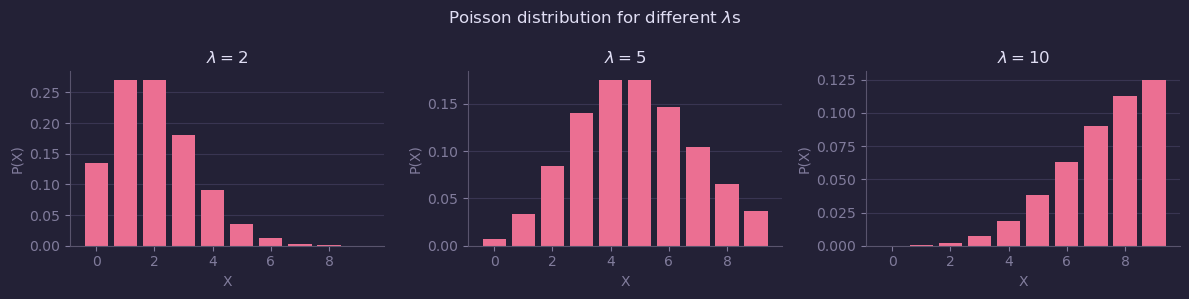

In [70]:
fig = plt.figure(figsize=(12,3), tight_layout=True)
fig.suptitle(r'Poisson distribution for different $\lambda$s')

for i in range(3):
    ax = fig.add_subplot(1,3,i+1)
    ax.bar(np.arange(0,10,1), all_probs[i])
    ax.set_title(r'$\lambda = ${}'.format(l[i]))
    ax.set_xlabel('X')
    ax.set_ylabel('P(X)')

Observations:
- For $\lambda < X_{mean}$ the Poisson distribution is *right-skewed*.
- For $\lambda = X_{mean}$ the Poisson distribution is *symmetric*.
- For $\lambda > X_{mean}$ the Poisson distribution is *left-skewed*.

#### 6.2 Approximating the Binomial Distribution

Poisson distribution acts as an approximation to Binomial distribution if *n* is large and *p* is small.

##### 6.2.1 Example

5% of a product are found to be defective. What is the probability of finding atmost three defective products in a sample of 100 random products.

Solution:<br>
We first solve problem using p.m.f of binomial distribution where $n=100$ and $p=0.05$. $P(X\leq 3)=$

In [71]:
n, p = 100, 0.05
probs = []
for i in range(4):
    probs.append(math.comb(n,i)*p**i*(1-p)**(n-i))
    
print(f'Using binomial p.m.f.\nP(at most 3 products are defective): {sum(probs):.4f}')

Using binomial p.m.f.
P(at most 3 products are defective): 0.2578


To solve using p.m.f of Poisson distribution we have to first calculate $\lambda$. We know that for both distributions mean would be same, i.e. $\lambda = np$

In [72]:
l = n*p
probs = []
for x in range(4):
    probs.append(l**x * math.exp(-l)/math.factorial(x))
print(f'Using Poisson p.m.f.\nP(at most 3 products are defective): {sum(probs):.4f}')

Using Poisson p.m.f.
P(at most 3 products are defective): 0.2650
